In [42]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_rel, ttest_ind


<h1>Analiza filmova</h1>
<p>Projekat iz Statističkih osnova inteligentne obrade podataka</p>
<p>Veljko Vračarević RN140</p>
<h2>Opis: </h2>

<h2>Sadržaj: </h2>
<ol>
    <li>Prikupljanje podataka</li>
    <li>Sređivanje podataka</li>
    <li>Analiza filmova po žanrovima</li>
    <li>Analiza filmova po godinama</li>
</ol>

<p>Skup podataka se sastoji od filmova i ponekih serija (pretežno filmovi) koje sam ranije gledao.
    Posmatraju se sledeća obeležja: 
    <ul>
        <li>Budžet</li>
        <li>Trajanje</li>
        <li>Žanr</li>
        <li>Ocena</li>
        <li>Godina</li>
        <li>Glumci</li>
    </ul>
</p>

<p>Kratak opis posmatranih obeležja: 
    <ul>
        <li><b>Budžet:</b> Budžet za snimanje filma. Mnogi budžeti koje sam nalazio su dati u vidu neke procene od-do, u tom slučaju sam uzimao aritmetičku sredinu.</li>
        <li><b>Trajanje:</b> Dužina filma izražena u minutima.</li>
        <li><b>Žanr:</b> Žanrovi su prikupljeni u vidu liste oblika ['žanr1', 'žanr2', ...], neki imaju više neki manje žanrova kojima pripadaju.</li>
        <li><b>Ocena:</b> Od 0 do 5 na osnovu ličnog utiska, ocene mogu biti i oblika 0,5, 1,5 itd.</li>
        <li><b>Godina:</b> Godina koje je film izašao u bioskope.</li>
        <li><b>Glumci:</b> Top 3 glumca.</li>
    </ul>
</p>

<h2>Prikupljanje podataka</h2>

<p>Za prikupljanje podataka sam koristio svoju već postojeću listu odgledanih filmova i serija na sajtu Letterboxd. (link do sajta) 
   </br></br>Eksportovane tabele sa podacima nisu posedovale sva obeležja potrebna za ovu analizu pa su žanrovi i dužine filmova naknadno unesene pomoću python web scrapera a budžeti ručno traženi za svaki element skupa.
   </br></br>Za web scraper su korišćeni linkovi do svakog filma koji su eksportovani sa sajta. Delovi koda kao i njihov kratak opis nalaze se u nastavku:
</p>

```python
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

data_frame = pd.read_csv(r'C:\Users\cho\Desktop\StatistikaProj\data\filmovi.csv')

links = np.asarray(data_frame["Letterboxd URI"])
length_rows = []
count = 0

for link in links:
    page_to_scrape = requests.get(link)

    soup = BeautifulSoup(page_to_scrape.text, "html.parser")
    p_tag = soup.find('p', class_='text-link text-footer')
    if p_tag:
        text = p_tag.get_text(strip=True)
        
        # filter for numeric characters
        minutes = ''.join(filter(str.isdigit, text.split('mins')[0].strip()))
        
        length_rows.append(minutes)

    count = count + 1
    print("Count: ", count)

df = pd.DataFrame(length_rows)

output_file = 'lengths.csv'
df.to_csv(output_file, index=False, header=False)

print(f"Lengths saved to {output_file}")
```

<h2>Sređivanje podataka</h2>

Obzirom na to da nisam uspeo da nađem budžete svih odgledanih filmova, filmovi bez budžeta (Budžet = 0) neće ući u analizu.

In [43]:
data_frame = pd.read_csv("data/filmovi.csv")
data_frame

,Title,Budget,Year,Genre,Rating,LetterboxdRating,Letterboxd URI,Length,Actors
0,13 Sins,4000000,2014,Thriller|Horror,3.5,2.92,https://boxd.it/4Ste,93,Mark Webber|Devon Graye|Tom Bower
1,A Monster Calls,43000000,2016,Animation|Fantasy|Adventure|Family|Drama,5.0,3.70,https://boxd.it/7DjE,108,Lewis MacDougall|Sigourney Weaver|Felicity Jones
2,A Nightmare on Elm Street,1800000,1984,Horror,3.5,3.72,https://boxd.it/2aw0,91,Heather Langenkamp|Robert Englund|Johnny Depp
3,A Serbian Film,0,2010,Horror|Thriller|Crime,1.5,1.80,https://boxd.it/2wBc,104,Sr?an '�ika' Todorovi?|Sergej Trifunovi?|Jelen...
4,Aladdin,28000000,1992,Adventure|Romance|Family|Fantasy|Animation,4.0,3.89,https://boxd.it/29yE,95,Scott Weinger|Robin Williams|Linda Larkin
...,...,...,...,...,...,...,...,...,...
342,X-Men Origins: Wolverine,175000000,2009,ScienceFiction|Adventure|Action,4.0,2.46,https://boxd.it/27ug,107,Hugh Jackman|Liev Schreiber|Danny Huston
343,Yes Man,70000000,2008,Comedy|Romance,3.5,3.12,https://boxd.it/1WPW,104,Jim Carrey|Zooey Deschanel|Bradley Cooper
344,Yu-Gi-Oh!,0,1998,Family|Animation|Comedy,5.0,3.80,https://boxd.it/u3RQ,648,Megumi Ogata|Toshiyuki Morikawa|Yumi Kakazu
345,Zombieland,23600000,2009,Comedy|Horror,3.5,3.53,https://boxd.it/1En6,88,Jesse Eisenberg|Woody Harrelson|Emma Stone


In [44]:
data_frame = data_frame[data_frame.Budget != 0]
data_frame

,Title,Budget,Year,Genre,Rating,LetterboxdRating,Letterboxd URI,Length,Actors
0,13 Sins,4000000,2014,Thriller|Horror,3.5,2.92,https://boxd.it/4Ste,93,Mark Webber|Devon Graye|Tom Bower
1,A Monster Calls,43000000,2016,Animation|Fantasy|Adventure|Family|Drama,5.0,3.70,https://boxd.it/7DjE,108,Lewis MacDougall|Sigourney Weaver|Felicity Jones
2,A Nightmare on Elm Street,1800000,1984,Horror,3.5,3.72,https://boxd.it/2aw0,91,Heather Langenkamp|Robert Englund|Johnny Depp
4,Aladdin,28000000,1992,Adventure|Romance|Family|Fantasy|Animation,4.0,3.89,https://boxd.it/29yE,95,Scott Weinger|Robin Williams|Linda Larkin
5,Alien,10700000,1979,Horror|ScienceFiction,4.5,4.26,https://boxd.it/2awY,117,Tom Skerritt|Sigourney Weaver|Veronica Cartwright
...,...,...,...,...,...,...,...,...,...
341,Wrong Turn 3: Left for Dead,2000000,2009,Thriller|Horror,2.0,2.08,https://boxd.it/1yJ6,91,Tom Frederic|Janet Montgomery|Louise Cliffe
342,X-Men Origins: Wolverine,175000000,2009,ScienceFiction|Adventure|Action,4.0,2.46,https://boxd.it/27ug,107,Hugh Jackman|Liev Schreiber|Danny Huston
343,Yes Man,70000000,2008,Comedy|Romance,3.5,3.12,https://boxd.it/1WPW,104,Jim Carrey|Zooey Deschanel|Bradley Cooper
345,Zombieland,23600000,2009,Comedy|Horror,3.5,3.53,https://boxd.it/1En6,88,Jesse Eisenberg|Woody Harrelson|Emma Stone


In [45]:
data_frame.describe()

,Budget,Year,Rating,LetterboxdRating,Length
count,2.730000e+02,273.000000,262.000000,273.000000,273.000000
mean,7.483736e+07,2007.520147,3.763359,3.330733,115.029304
std,8.801633e+07,10.604199,0.848321,0.671288,35.927918
min,7.000000e+03,1937.000000,0.000000,1.240000,48.000000
25%,1.070000e+07,2003.000000,3.000000,2.910000,93.000000
50%,4.000000e+07,2009.000000,4.000000,3.410000,108.000000
75%,1.150000e+08,2014.000000,4.500000,3.790000,128.000000
max,4.600000e+08,2024.000000,5.000000,4.620000,495.000000


<h2>Analiza filmova</h2>

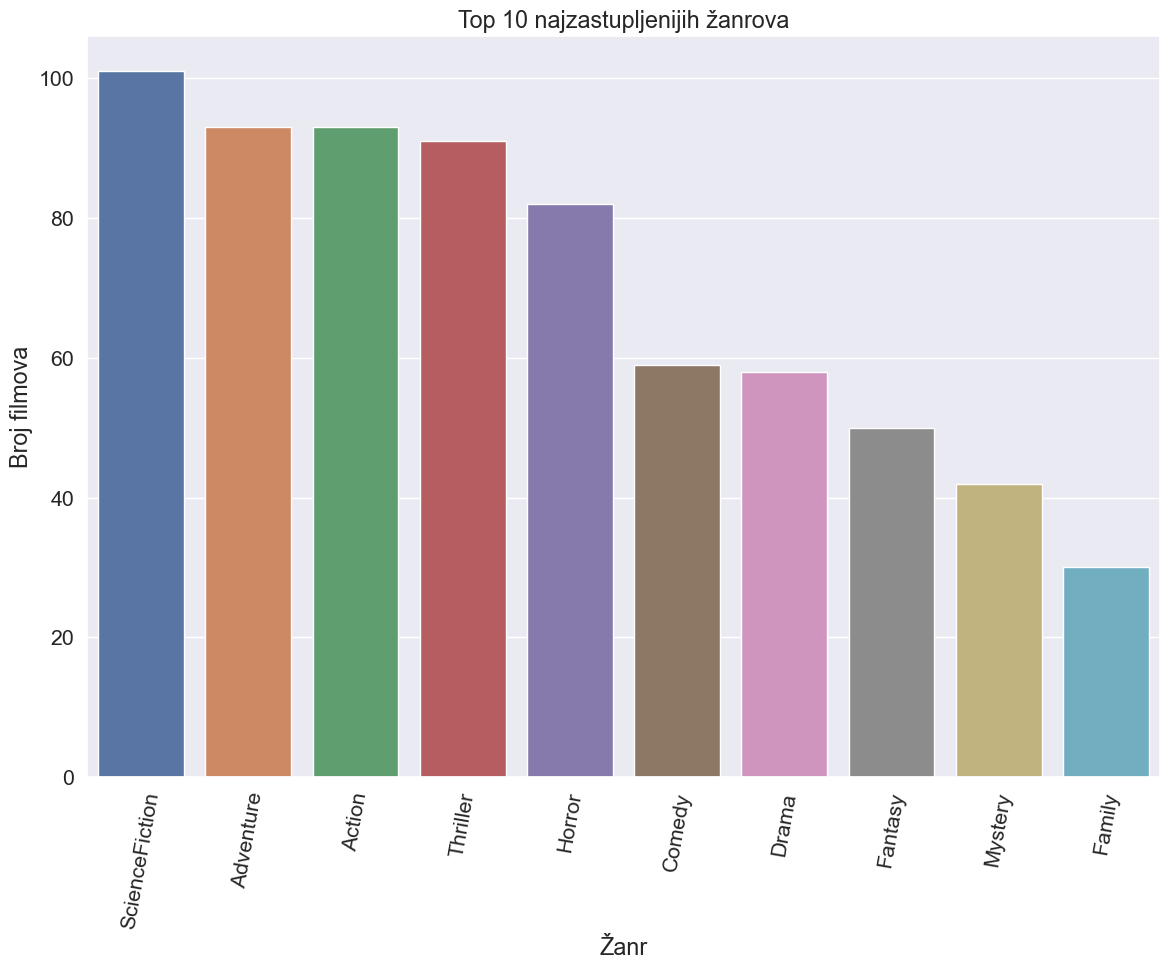

In [ ]:
# Brojanje najzastupljenijih žanrova

genre_dict = {}

# Uzimamo kolonu sa žanrovima i pravimo listu po filmovima
genres = data_frame["Genre"].str.split("|")
genres = np.array(genres)

# Brojanje pojavljivanja svakog žanra
for genreList in genres:
    for genre in genreList:
        genre = genre.lstrip()  # uklanjanje vodećih razmaka
        genre_dict[genre] = genre_dict.get(genre, 0) + 1

sorted_genre_dict = sorted(
    genre_dict.items(), key=operator.itemgetter(1), reverse=True
)

# Priprema podataka za barplot
x_axis = [item[0] for item in sorted_genre_dict[:10]]  # nazivi žanrova
y_axis = [item[1] for item in sorted_genre_dict[:10]]  # broj filmova


sns.set_theme(rc={"figure.figsize": (12, 10)}, font_scale=1.4)
ax = sns.barplot(x=x_axis, y=y_axis, hue=x_axis, legend=False)

# Rotiranje naziva žanrova na x-osi radi preglednosti
for item in ax.get_xticklabels():
    item.set_rotation(80)

ax.set(
    xlabel="Žanr",
    ylabel="Broj filmova",
    title="Top 10 najzastupljenijih žanrova",
)
plt.tight_layout()
plt.show()

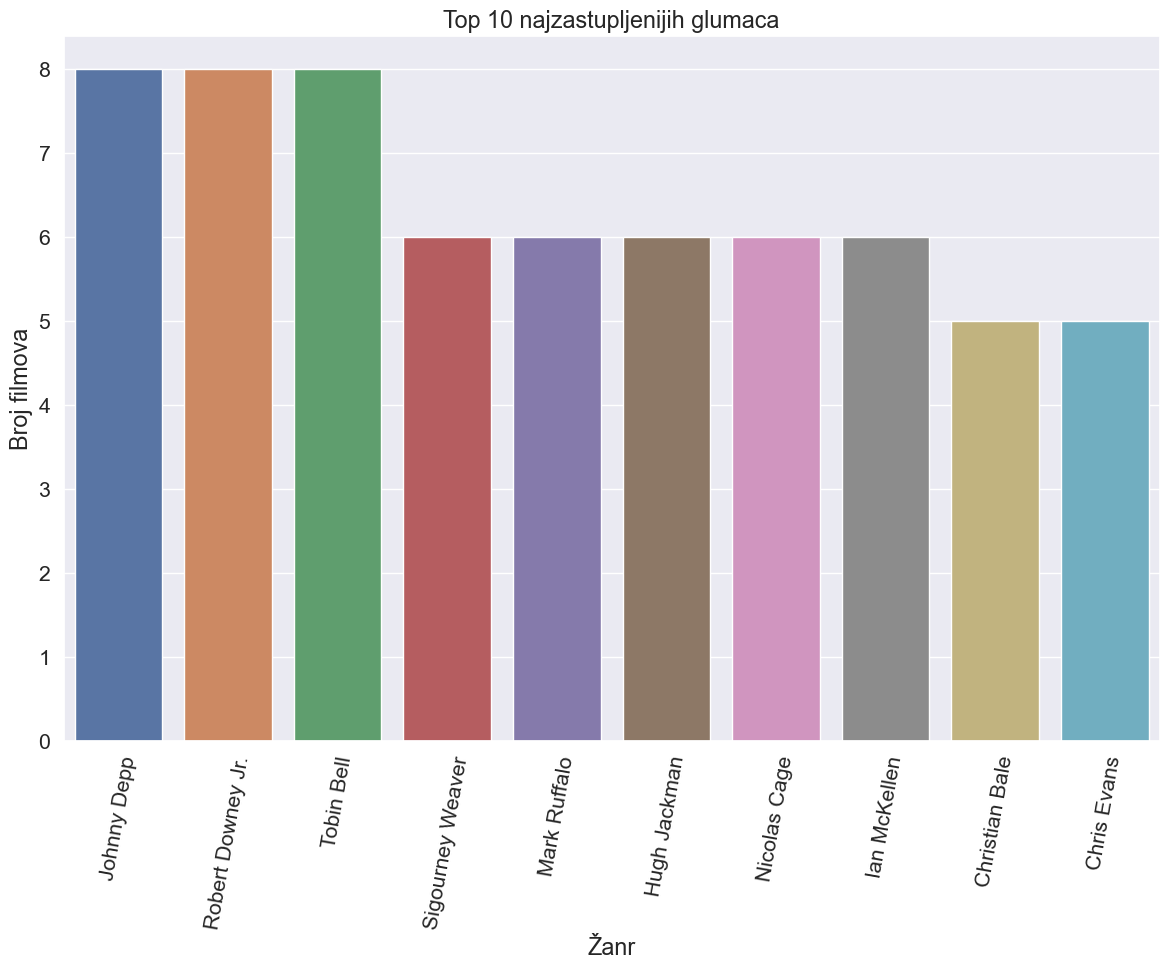

In [ ]:
# Brojanje najzastupljenijih glumaca

actor_dict = {}

# Uzimamo kolonu sa glumcima i pravimo listu po filmovima
actors = data_frame["Actors"].str.split("|")
actors = np.array(actors)

# Brojanje pojavljivanja svakog glumca
for actorList in actors:
    for actor in actorList:
        actor = actor.lstrip()  # uklanjanje vodećih razmaka
        actor_dict[actor] = actor_dict.get(actor, 0) + 1

sorted_actor_dict = sorted(
    actor_dict.items(), key=operator.itemgetter(1), reverse=True
)

x_axis = [item[0] for item in sorted_actor_dict[:10]]  # imena glumaca
y_axis = [item[1] for item in sorted_actor_dict[:10]]  # broj pojavljivanja

sns.set_theme(rc={"figure.figsize": (12, 10)}, font_scale=1.4)
ax = sns.barplot(x=x_axis, y=y_axis, hue=x_axis, legend=False)

# Rotiranje naziva glumaca na x-osi radi preglednosti
for item in ax.get_xticklabels():
    item.set_rotation(80)

ax.set(
    xlabel="Glumac",
    ylabel="Broj filmova",
    title="Top 10 najzastupljenijih glumaca",
)

plt.tight_layout()
plt.show()

In [ ]:
year_set = set()
genre_set = set()
genres_and_year = data_frame[["Genre", "Year"]]

#
# Jedinstvene godine iz DataFramea
#
production_year = genres_and_year["Year"].drop_duplicates()
for year in production_year:
    year_set.add(year)

#
# Jedinstveni žanrovi iz DataFramea
#
for year in year_set:
    genres_in_year = genres_and_year[genres_and_year.Year == year][
        "Genre"
    ].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            genre_set.add(genre)


#
# Ukupan broj filmova po žanru i godini
#
gerne_count_per_year_df = pd.DataFrame(
    index=sorted(year_set), columns=sorted(genre_set)
)
gerne_count_per_year_df[:] = 0

for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.Year == year][
        "Genre"
    ].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            genre_dict[genre] = genre_dict.get(genre, 0) + 1

    # Update glavnog DataFramea sa brojem filmova po žanrovima
    aux_df = pd.DataFrame(genre_dict, index=[year])
    gerne_count_per_year_df.loc[year, aux_df.columns] += aux_df.loc[year]


#
# Najpopularniji žanr po godini
#
most_popular_genre_by_year = pd.DataFrame(
    [
        gerne_count_per_year_df.idxmax(axis=1).values,  # najpopularniji žanr
        gerne_count_per_year_df.max(axis=1).values,  # broj filmova u tom žanru
    ],
    columns=gerne_count_per_year_df.index,
    index=["genre", "counts"],
)

In [49]:
most_popular_genre_by_year

,1937,1972,1979,1980,1981,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
genre,Animation,Crime,Horror,Horror,Action,Action,Comedy,Action,Thriller,Fantasy,...,ScienceFiction,Action,ScienceFiction,Action,Drama,ScienceFiction,Adventure,Comedy,Action,ScienceFiction
counts,1,1,1,1,1,2,2,1,2,2,...,8,4,7,4,5,2,3,2,3,5


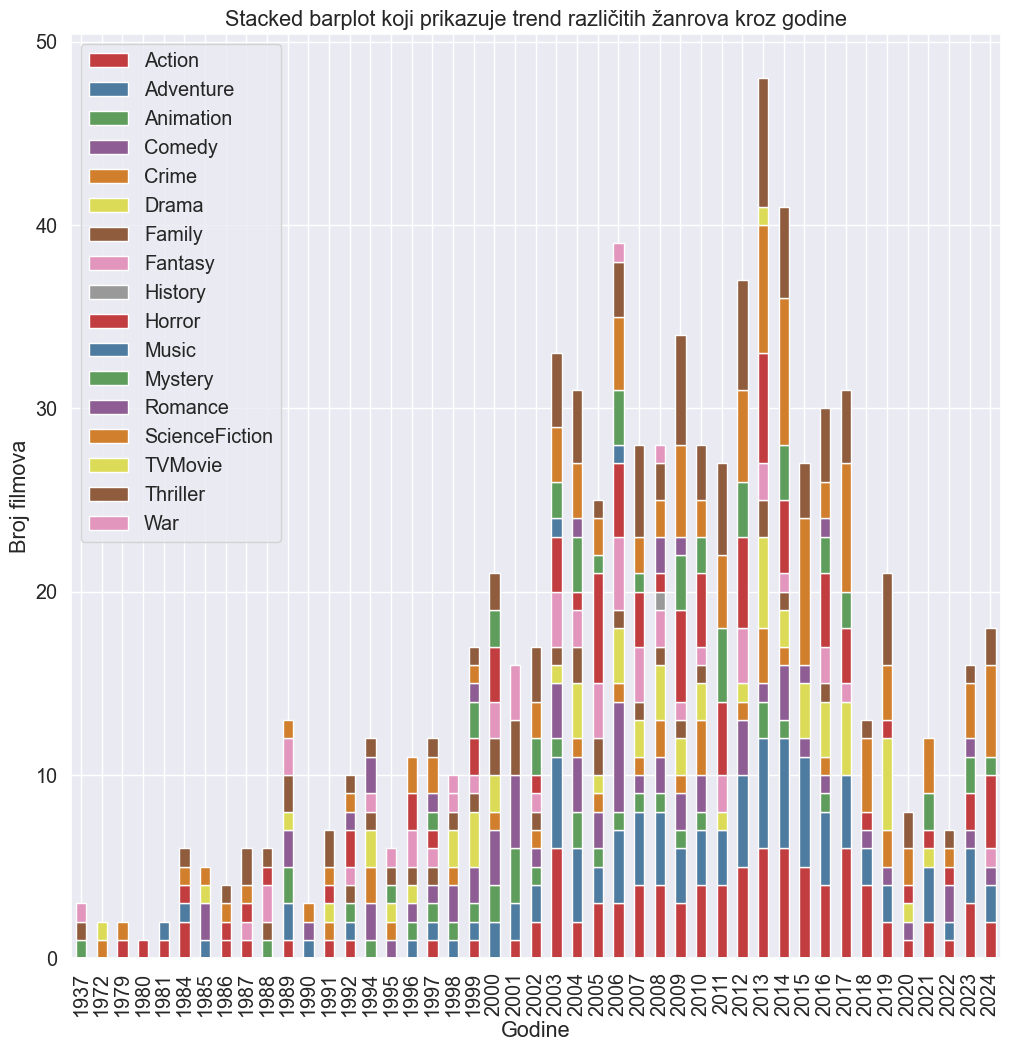

In [ ]:
sns.set_theme(rc={"figure.figsize": (12, 12)}, font_scale=1.3)
sns.set_palette("Set1", 20, 0.65)

# Stacked barplot prikazuje trend različitih žanrova kroz godine
ax = gerne_count_per_year_df.plot.bar(stacked=True)


ax.set(
    xlabel="Godine",
    ylabel="Broj filmova",
    title="Stacked barplot koji prikazuje trend različitih žanrova kroz godine",
)

plt.show()

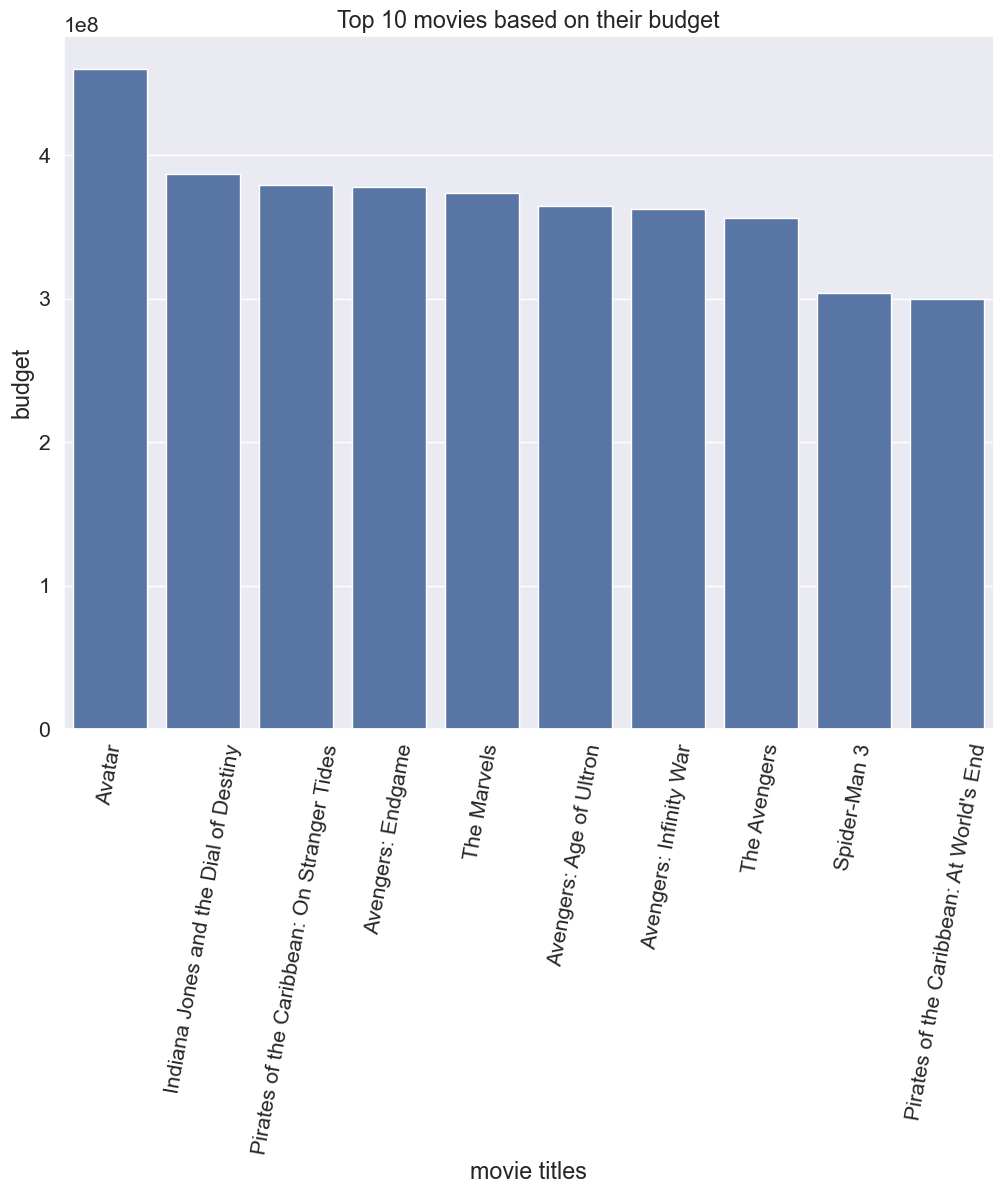

In [ ]:
#
# Top 10 filmova sa najvećim budžetom
#

movies_and_budget = data_frame[["Title", "Budget"]]

sns.set_theme(rc={"figure.figsize": (12, 9)}, font_scale=1.4)

# Sortiranje po budžetu i uzimanje top 10 filmova
top_movies = movies_and_budget.sort_values(by="Budget", ascending=False).head(
    10
)

ax = sns.barplot(x=top_movies["Title"], y=top_movies["Budget"])

# Rotiranje naziva filmova na x-osi radi preglednosti
for item in ax.get_xticklabels():
    item.set_rotation(80)

ax.set(
    xlabel="Nazivi filmova",
    ylabel="Budžet",
    title="Top 10 filmova po budžetu",
)

plt.show()

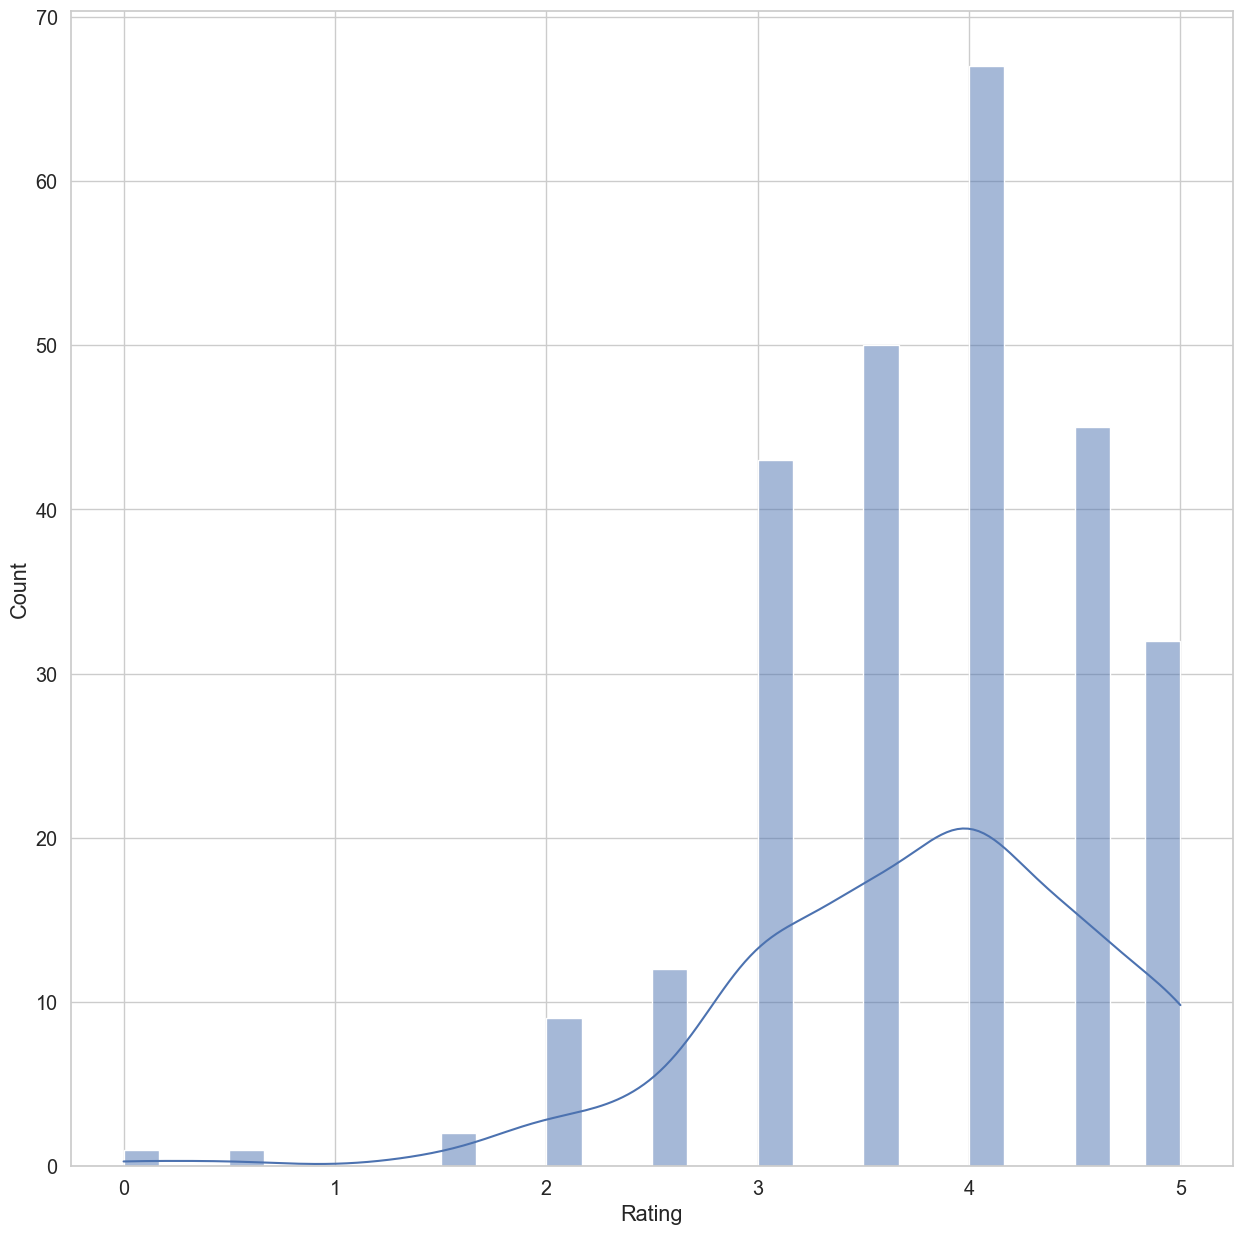

In [ ]:
#
# Raspodela ocena filmova kroz godine
#

sns.set_theme(rc={"figure.figsize": (15, 15)}, font_scale=1.3)

temp_df = data_frame[["Rating"]]

sns.set_style("whitegrid")
ax = sns.histplot(temp_df["Rating"], bins=30, kde=True)
plt.show()

# Korelacije

Text(0.5, 0.98, 'Scatter plot i korelacija: Moje ocene i Letterboxd ocene')

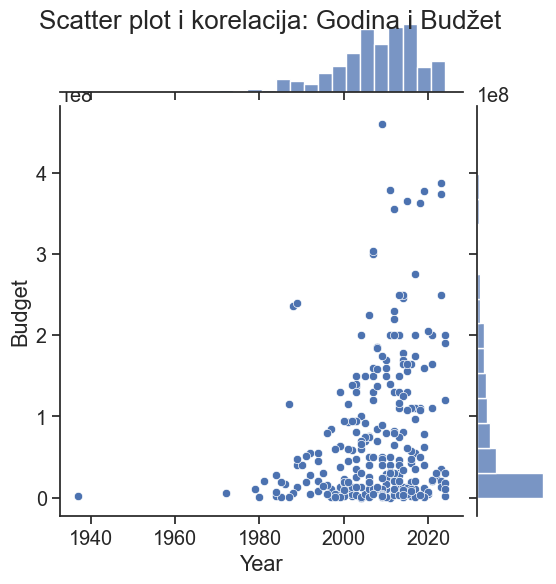

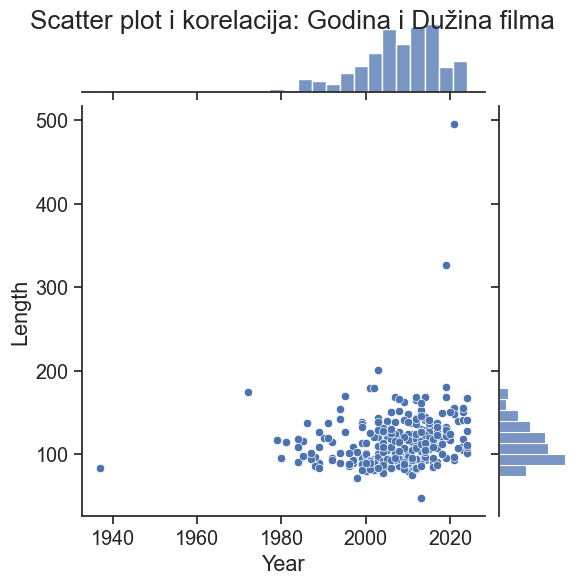

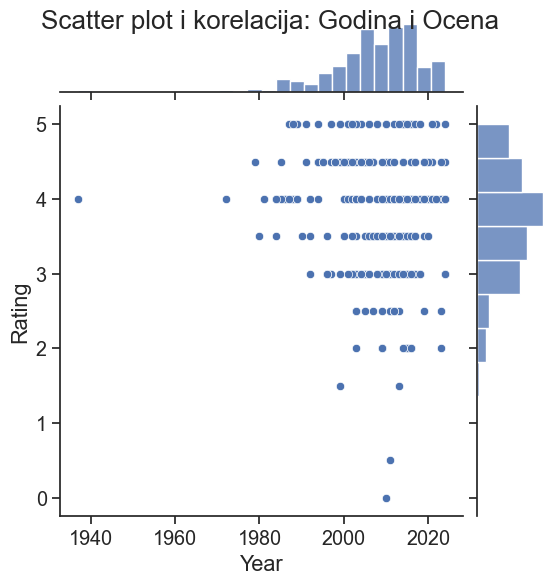

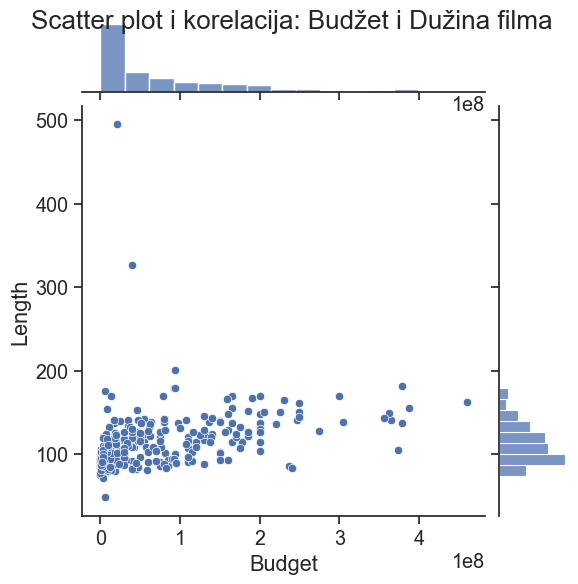

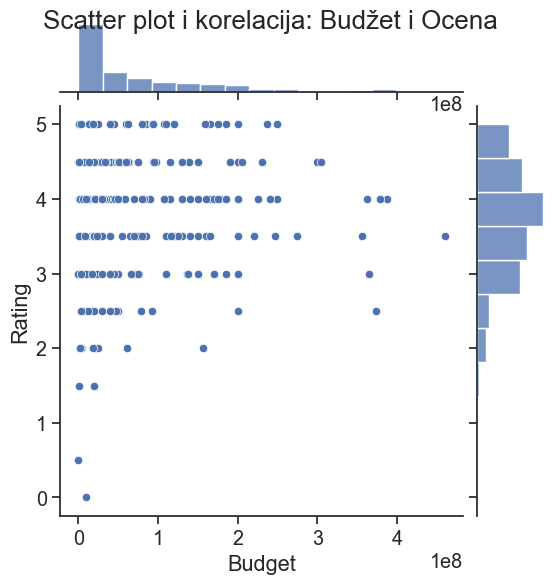

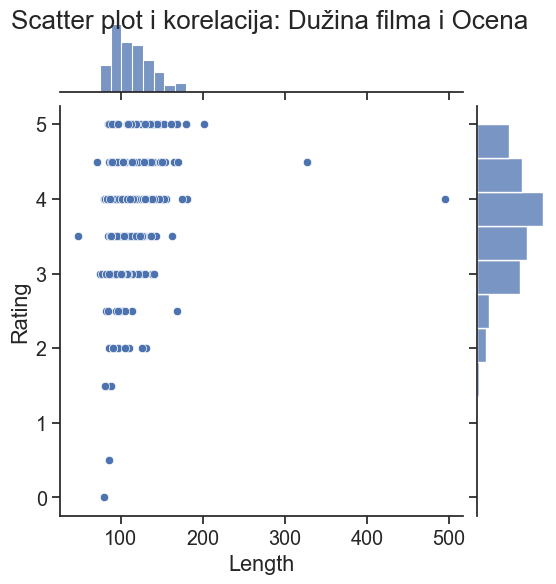

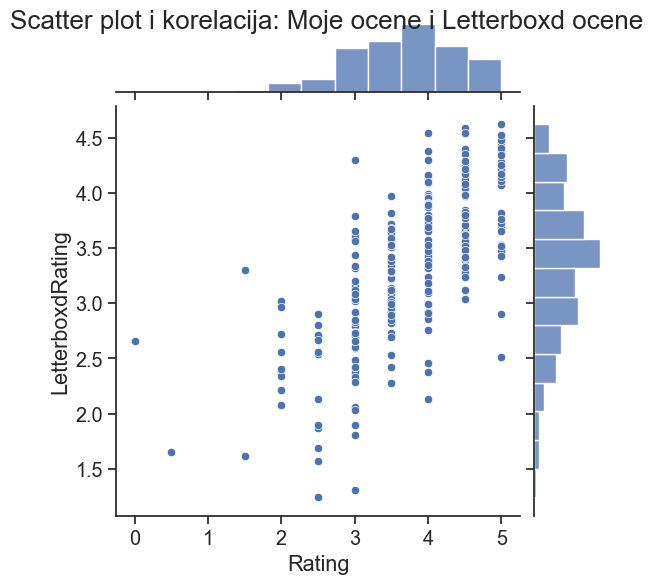

In [59]:
# Kreiranje pomoćnog DataFrame
temp_df = data_frame[
    ["Budget", "Year", "Length", "Rating", "LetterboxdRating"]
]

sns.set_theme(rc={"figure.figsize": (15, 15)}, font_scale=1.3, style="ticks")

# Scatter plot i korelacija između godina i budžeta
f1 = sns.jointplot(x="Year", y="Budget", kind="scatter", data=temp_df)
f1.figure.suptitle("Scatter plot i korelacija: Godina i Budžet")

# Scatter plot i korelacija između godina i dužine filma
f2 = sns.jointplot(x="Year", y="Length", kind="scatter", data=temp_df)
f2.figure.suptitle("Scatter plot i korelacija: Godina i Dužina filma")

# Scatter plot i korelacija između godina i ocena
f3 = sns.jointplot(x="Year", y="Rating", kind="scatter", data=temp_df)
f3.figure.suptitle("Scatter plot i korelacija: Godina i Ocena")

# Scatter plot i korelacija između budžeta i dužine filma
f4 = sns.jointplot(x="Budget", y="Length", kind="scatter", data=temp_df)
f4.figure.suptitle("Scatter plot i korelacija: Budžet i Dužina filma")

# Scatter plot i korelacija između budžeta i ocene
f5 = sns.jointplot(x="Budget", y="Rating", kind="scatter", data=temp_df)
f5.figure.suptitle("Scatter plot i korelacija: Budžet i Ocena")

# Scatter plot i korelacija između dužine filma i ocene
f6 = sns.jointplot(x="Length", y="Rating", kind="scatter", data=temp_df)
f6.figure.suptitle("Scatter plot i korelacija: Dužina filma i Ocena")

# Scatter plot i korelacija između mojih ocena i Letterboxd ocena
f7 = sns.jointplot(
    x="Rating", y="LetterboxdRating", kind="scatter", data=temp_df
)
f7.figure.suptitle("Scatter plot i korelacija: Moje ocene i Letterboxd ocene")

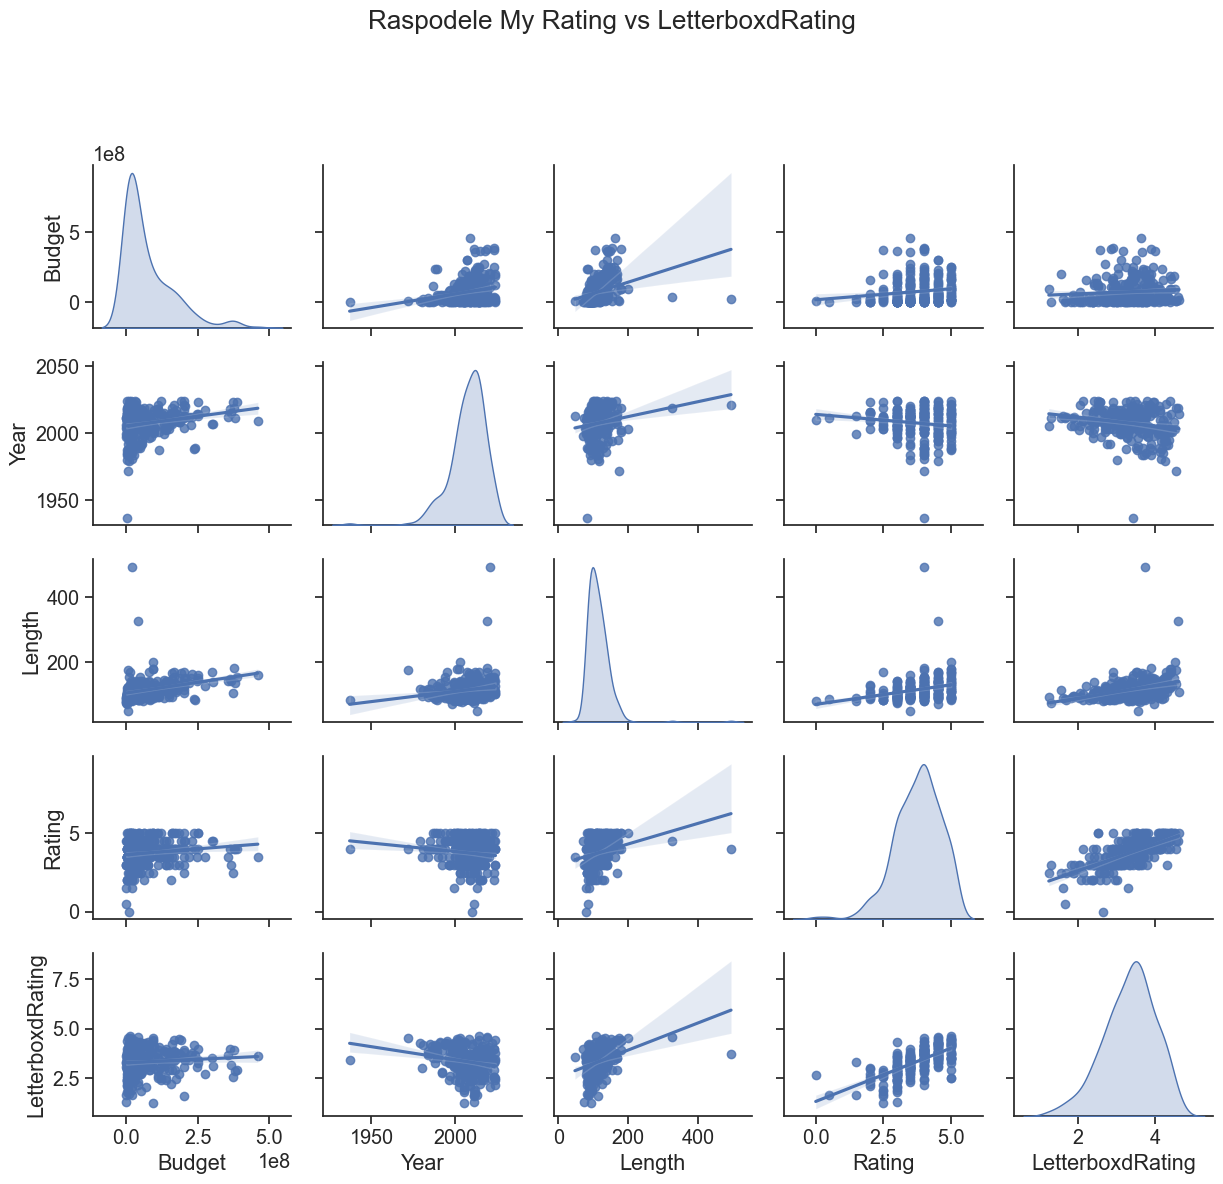

In [54]:
f1 = sns.pairplot(
    aux_df, kind="reg", diag_kind="kde", diag_kws=dict(fill=True)
)
f1.figure.suptitle("Raspodele My Rating vs LetterboxdRating\n")
f1.figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Testiranje Hipoteza

### Moje ocene vs Letterboxd ocene

Da li se moje ocene filmova razlikuju od ocena sa sajta Letterboxd?\
H0: Nema statistički značajne razlike u ocenama.
H1: Ima statistički značajne razlike u ocenama.

Koristimo parni T-test: 

$$
D_i = X_i - Y_i
$$

T-statistika:

$$
t = \frac{\bar{D}}{s_D / \sqrt{n}}
$$

gde je:
$$
\bar{D} = \frac{1}{n} \sum_{i=1}^{n} D_i \quad \text{(prosečna razlika)}
$$

$$
s_D = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (D_i - \bar{D})^2} \quad \text{(standardna devijacija razlika)}
$$

$$
n = \text{broj parova}
$$

Stepeni slobode:

$$
df = n - 1
$$


Parni t-test: t=10.620, p=0.000


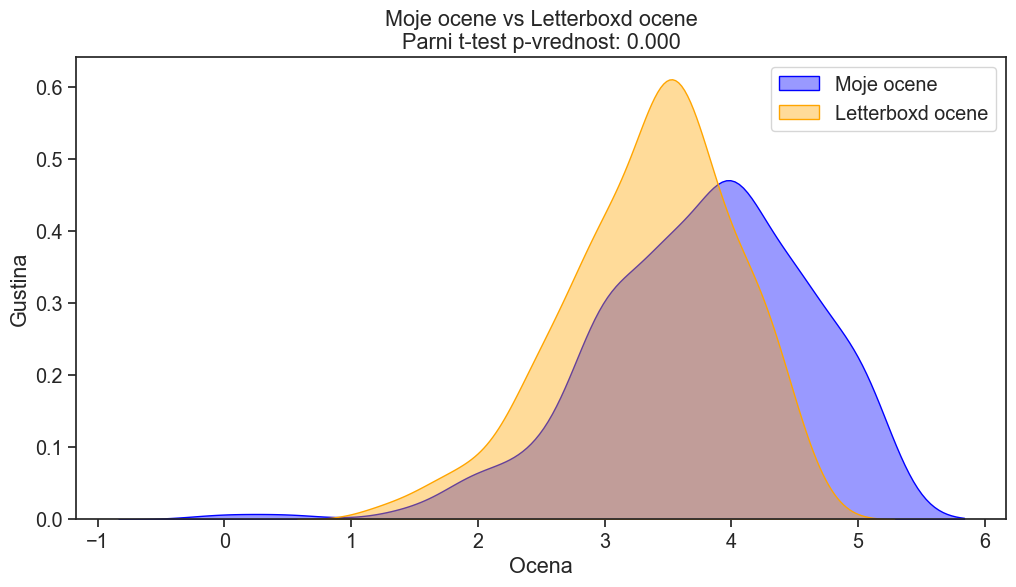

In [55]:
sns.set_theme(style="ticks", font_scale=1.3)

# Kreiranje DataFrame-a sa parnim ocenjivanjima (moje ocene i Letterboxd ocene)
paired_df = aux_df.dropna(subset=["Rating", "LetterboxdRating"])

# Parni T-test
t_stat, p_value = ttest_rel(paired_df["Rating"], paired_df["LetterboxdRating"])
print(f"Parni t-test: t={t_stat:.3f}, p={p_value:.3f}")

# Crtanje raspodela
plt.figure(figsize=(12, 6))
sns.kdeplot(
    paired_df["Rating"], fill=True, color="blue", label="Moje ocene", alpha=0.4
)
sns.kdeplot(
    paired_df["LetterboxdRating"],
    fill=True,
    color="orange",
    label="Letterboxd ocene",
    alpha=0.4,
)

plt.title(
    f"Moje ocene vs Letterboxd ocene\nParni t-test p-vrednost: {p_value:.3f}"
)
plt.xlabel("Ocena")
plt.ylabel("Gustina")
plt.legend()
plt.show()

In [56]:
def zakljucak_parni(t_stat, p_value, alpha=0.05):
    if p_value < alpha:
        rez = "postoji statistički značajna razlika"
    else:
        rez = "nema statistički značajne razlike"
    return (
        f"Parni t-test je pokazao t-statistiku = {t_stat:.3f} "
        f"i p-vrednost = {p_value:.3f}. "
        f"S obzirom na p-vrednost, možemo zaključiti da {rez} "
        "između mojih ocena i ocena sa sajta Letterboxd."
    )


print(zakljucak_parni(t_stat, p_value))

Parni t-test je pokazao t-statistiku = 10.620 i p-vrednost = 0.000. S obzirom na p-vrednost, možemo zaključiti da postoji statistički značajna razlika između mojih ocena i ocena sa sajta Letterboxd.


### Ocene filmova sa visokim i niskim budžetom

Da li se prosečne ocene filmova sa visokim budžetom razlikuju od prosečnih ocena filmova sa niskim budžetom?  
H0: Nema statistički značajne razlike u ocenama između filmova sa visokim i niskim budžetom.  
H1: Postoji statistički značajna razlika u ocenama između filmova sa visokim i niskim budžetom.

Koristimo nezavisni T-test:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

gde je:

$$
\bar{X}_1 = \text{prosečna ocena filmova sa visokim budžetom}, \quad
\bar{X}_2 = \text{prosečna ocena filmova sa niskim budžetom}
$$

$$
s_1^2 = \text{varijansa ocena filmova sa visokim budžetom}, \quad
s_2^2 = \text{varijansa ocena filmova sa niskim budžetom}
$$

$$
n_1 = \text{broj filmova sa visokim budžetom}, \quad
n_2 = \text{broj filmova sa niskim budžetom}
$$

Stepeni slobode:

$$
df = n_1 + n_2 - 2
$$

Visok vs Nizak budžet: t=3.500, p=0.001


C:\Users\vraca\AppData\Local\Temp\ipykernel_12508\210813707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["BudgetCategory"] = np.where(
C:\Users\vraca\AppData\Local\Temp\ipykernel_12508\210813707.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


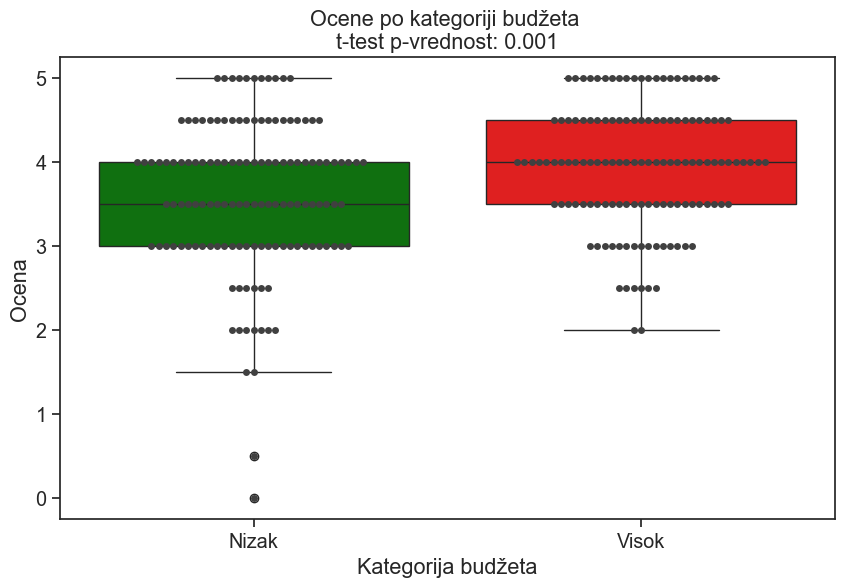

In [57]:
# Određivanje medijane budžeta i kategorizacija filmova
median_budget = data_frame["Budget"].median()
data_frame["BudgetCategory"] = np.where(
    data_frame["Budget"] > median_budget, "Visok", "Nizak"
)

# Nezavisni T-test između filmova sa visokim i niskim budžetom
high_budget = data_frame[data_frame["BudgetCategory"] == "Visok"][
    "Rating"
].dropna()
low_budget = data_frame[data_frame["BudgetCategory"] == "Nizak"][
    "Rating"
].dropna()
t_stat, p_value = ttest_ind(high_budget, low_budget)
print(f"Visok vs Nizak budžet: t={t_stat:.3f}, p={p_value:.3f}")

# Crtanje Boxplot i swarmplot raspodele ocena po budžetima
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="BudgetCategory",
    y="Rating",
    data=data_frame,
    palette=["green", "red"],
    legend=False,
)
sns.swarmplot(x="BudgetCategory", y="Rating", data=data_frame, color=".25")

plt.title(f"Ocene po kategoriji budžeta \nt-test p-vrednost: {p_value:.3f}")
plt.xlabel("Kategorija budžeta")
plt.ylabel("Ocena")
plt.show()

Boxplot prikazuje medijanu, kvartile i opseg ocena po kategorijama budžeta. Swarmplot prikazuje pojedinačne ocene filmova.
Ocene izvan "brkova" boxplota predstavljaju outliere.

In [58]:
def zakljucak_nezavisni(t_stat, p_value, alpha=0.05):
    if p_value < alpha:
        rez = "postoji statistički značajna razlika"
    else:
        rez = "nema statistički značajne razlike"
    return (
        f"Nezavisni t-test je pokazao t-statistiku = {t_stat:.3f} "
        f"i p-vrednost = {p_value:.3f}. "
        f"Na osnovu p-vrednosti možemo zaključiti da {rez} "
        "u ocenama između filmova sa različitim budžetom."
    )


print(zakljucak_nezavisni(t_stat, p_value))

Nezavisni t-test je pokazao t-statistiku = 3.500 i p-vrednost = 0.001. Na osnovu p-vrednosti možemo zaključiti da postoji statistički značajna razlika u ocenama između filmova sa različitim budžetom.
